# Movie Industry Analysis

Author: Hannah Maung

### Dataset 

In this notebook, we are analyzing a movie industry dataset. The dataset has over 6820 movies, with 220 movies per year from 1986-2016. The data was scraped from IMDb (https://www.imdb.com/). The specific data set I will be using can be found at the following link:
- **Kaggle**: https://www.kaggle.com/datasets/danielgrijalvas/movies?resource=download&select=movies.csv

### Sections 

This notebook is split into 6 sections: 
1. An Explatory Analysis
2. Analyzing Movie Genres
3. Analyzing Movie Ratings
4. Analyzing Movie Runtimes
5. Analyzing Movie Budgets
6. Analyzing People Involved

In [55]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

## 1. Exploratory data analysis

In [56]:
#read in data set
df = pd.read_csv("movies.csv", encoding='latin-1')

#print out first 10 rows of the data set
df.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [57]:
#prints out the last 10 rows of the dataset
df.tail(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0
7667,Tee em el,NaN,Horror,2020,"August 19, 2020 (United States)",5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,NaN,NaN,PK 65 Films,102.0


In [58]:
#returns shape of the array (rows,columns)
df.shape

(7668, 15)

In [59]:
#returns column names
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

### Movies Relevant Columns/Variables

- **name**: the name of the movie.
- **rating**: the level of movie rating (G, PG, PG-13...).
- **genre**: the genre of the movie.
- **year**: the year that the movie was released.
- **released**: the full date (Month, Date, Year) that the movie was released.
- **score**: out of 10, the average score of the movie. 
- **votes**: votes casted for that specific movie. 
- **director**: the director for the movie.
- **writer**: the writer for the movie.
- **star**: the movie star, what actor/actress is starring in it.
- **country**: the country of a title as the place/places where the production companies for that title are based.
- **budget**: the production cost of the movie.
- **gross**: how much the movie made at the box office.
- **company**: the production company of the movie.
- **runtime**: records the duration in minutes of titles in the database.

In [60]:
#returns all variables in dataset
df.columns.value_counts()

name        1
rating      1
genre       1
year        1
released    1
score       1
votes       1
director    1
writer      1
star        1
country     1
budget      1
gross       1
company     1
runtime     1
dtype: int64

In [61]:
#returns information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [62]:
#returns description of data
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [63]:
#number of observations that are null for each column
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [64]:
#shows all the years that our dataset covers
df.year.unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

## 2. Analyzing Genres 

Here are all the different genres that our dataset covers:

In [65]:
#prints out all different genres
df.genre.unique()

array(['Drama', 'Adventure', 'Action', 'Comedy', 'Horror', 'Biography',
       'Crime', 'Fantasy', 'Family', 'Sci-Fi', 'Animation', 'Romance',
       'Music', 'Western', 'Thriller', 'History', 'Mystery', 'Sport',
       'Musical'], dtype=object)

As we can see below, the top 3 genres are Comedy, Action, then Drama

In [66]:
#finds num of movies for each genre
num_genres = df.genre.value_counts()
num_genres

Comedy       2245
Action       1705
Drama        1518
Crime         551
Biography     443
Adventure     427
Animation     338
Horror        322
Fantasy        44
Mystery        20
Thriller       16
Family         11
Sci-Fi         10
Romance        10
Western         3
Musical         2
Music           1
History         1
Sport           1
Name: genre, dtype: int64

The following is a graph that displays the number of different movies this data set has for each genre. We can see that comedy is the most popular movie. 

In [67]:
#prints out bar graph of genres 
fig = px.bar(df, x = 'genre', y= df.genre.index, color = df.genre, labels={"x":"Genres","index":"Count"})
fig.show()

The genre with the highest paying movie is Action. The highest-grossing movie at the global box office is Avatar with $2.84 billion

In [68]:
#finding max of gross
df[df['gross'] == df['gross'].max()][["genre","name","gross"]]

,genre,name,gross
5445,Action,Avatar,2.847246e+09


The genre with the lowest paying movie is Comedy. The lowest-grossing movie at the global box office is Trojan War with $309.

In [69]:
#finding min of gross
df[df['gross'] == df['gross'].min()][["name","genre","gross"]]

,name,genre,gross
3203,Trojan War,Comedy,309.0


We can see that the genre with the highest gross is Action. 

In [70]:
#plotting genres vs gross
fig = px.bar(data_frame=df.genre, x=df.genre.values, y=df.gross, color = 'genre',labels={"x":"Genres","y":"Gross ($)"})
fig.show()

## 3. Analyzing movie ratings

The highest rated movie is a 9.3, while the lowest rated movie is a 1.

In [71]:
#prints out all different movie ratings out of 10
df.score.unique()

array([8.4, 5.8, 8.7, 7.7, 7.3, 6.4, 7.9, 8.2, 6.8, 7. , 6.1, 5.3, 7.1,
       7.2, 6.6, 6.9, 6.5, 6.7, 5. , 6.2, 5.4, 6.3, 6. , 5.9, 7.5, 4.8,
       4.6, 5.1, 8.3, 4.2, 5.5, 8.1, 4.7, 5.2, 7.4, 4. , 4.3, 7.6, 4.9,
       3.4, 7.8, 5.6, 2.7, 2.9, 4.4, 8. , 5.7, 3.7, 3.6, 3.9, 3.5, 3.8,
       4.1, 3. , 4.5, 8.5, 3.2, 2.6, 2.2, 3.1, 8.6, 8.9, 9.3, 8.8, 3.3,
       2.5, 2.3, 2.1, 1.9, 2.4, 2.8, 9. , nan])

In [72]:
#prints concise summary of the dataset
df["score"].describe()

count    7665.000000
mean        6.390411
std         0.968842
min         1.900000
25%         5.800000
50%         6.500000
75%         7.100000
max         9.300000
Name: score, dtype: float64

The distribution is negatively/left skewed

In [73]:
#prints histogram of movie scores
fig = px.histogram(data_frame=df, x=df["score"], title="Movie Scores")
fig.show()

Here is the highest rated movie:

In [74]:
#finds max movie score
df[df["score"] == df["score"].max()][["name", "genre","year"]]

,name,genre,year
2443,The Shawshank Redemption,Drama,1994


Here is the lowest rated movie:

In [75]:
#finds min movie score
df[df["score"] == df["score"].min()][["name", "genre","year"]]

,name,genre,year
4594,Superbabies: Baby Geniuses 2,Comedy,2004
5306,Disaster Movie,Comedy,2008
5354,The Hottie & the Nottie,Comedy,2008


Here are the top 15 highest rated movies:

In [76]:
#finds highest rated movies
highest_rated_all = df.sort_values('score', ascending=False)[:15]
highest_rated_movies = highest_rated_all[['name', 'genre', 'year', 'score']]
highest_rated_movies

,name,genre,year,score
2443,The Shawshank Redemption,Drama,1994,9.3
5243,The Dark Knight,Action,2008,9.0
2247,Schindler's List,Biography,1993,8.9
2444,Pulp Fiction,Crime,1994,8.9
4245,The Lord of the Rings: The Return of the King,Action,2003,8.9
5643,Inception,Action,2010,8.8
3845,The Lord of the Rings: The Fellowship of the Ring,Action,2001,8.8
2445,Forrest Gump,Drama,1994,8.8
3444,Fight Club,Drama,1999,8.8
4048,The Lord of the Rings: The Two Towers,Action,2002,8.7


And the lowest 15 rated movies:

In [77]:
#finds lowest rated movies, sorts by descending order
lowest_rated_all = df.sort_values('score', ascending=True)[:15]
lowest_rated_movies = lowest_rated_all[['name', 'genre', 'year', 'score']]
lowest_rated_movies

,name,genre,year,score
5354,The Hottie & the Nottie,Comedy,2008,1.9
4594,Superbabies: Baby Geniuses 2,Comedy,2004,1.9
5306,Disaster Movie,Comedy,2008,1.9
4412,From Justin to Kelly,Comedy,2003,2.1
4342,House of the Dead,Action,2003,2.1
5194,Who's Your Caddy?,Comedy,2007,2.2
4723,Son of the Mask,Comedy,2005,2.2
1189,Leonard Part 6,Action,1987,2.2
7595,Student of the Year 2,Action,2019,2.2
4022,Glitter,Drama,2001,2.3


## 4. Analyzing runtime 
- Runtime: the time between the starting of the movie upto the end of the credits scene

In [78]:
#describes runtime
df.runtime.describe()

count    7664.000000
mean      107.261613
std        18.581247
min        55.000000
25%        95.000000
50%       104.000000
75%       116.000000
max       366.000000
Name: runtime, dtype: float64

In [79]:
#plots histrogram of runtime of programs
fig = px.histogram(data_frame=df, x="runtime",title="Runtime of Programs")
fig.show()

The movie with the highest runtime of 366.0

In [80]:
#finds movie with max runtime
df[df["runtime"] == df["runtime"].max()][["name","runtime", "genre","year"]]

,name,runtime,genre,year
4396,The Best of Youth,366.0,Drama,2003


The movie with the lowest runtime of 55.0

In [81]:
#finds movie with lowest runtime
df[df["runtime"] == df["runtime"].min()][["name","runtime", "genre","year"]]

,name,runtime,genre,year
474,The Business of Show Business,55.0,History,1983


Here is a graph that shows the top ten movies with the highest runtime:

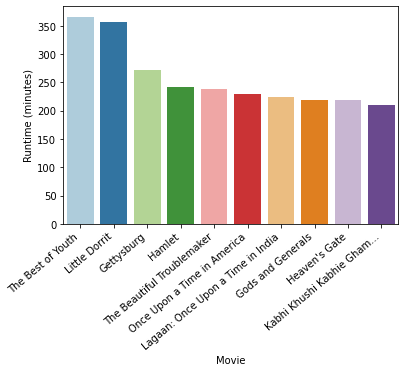

In [82]:
#sorts runtime values from descending order
high_runtime_df = df.sort_values('runtime',ascending=False)[:10]
high_runtime = high_runtime_df[['name', 'runtime', 'gross']]

#plots bar graph
expensiveplot = sns.barplot(x = 'name',y='runtime', data=high_runtime, palette="Paired")
expensiveplot.set_xticklabels(expensiveplot.get_xticklabels(), rotation=40, ha="right")
expensiveplot.set(xlabel='Movie', ylabel='Runtime (minutes)')

plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [83]:
#prints out table of the top 10 movies with highest runtime
high_runtime = high_runtime_df[['name', 'runtime', 'year']]
high_runtime

,name,runtime,year
4396,The Best of Youth,366.0,2003
1218,Little Dorrit,357.0,1987
2280,Gettysburg,271.0,1993
2888,Hamlet,242.0,1996
1868,The Beautiful Troublemaker,238.0,1991
479,Once Upon a Time in America,229.0,1984
3962,Lagaan: Once Upon a Time in India,224.0,2001
4343,Gods and Generals,219.0,2003
21,Heaven's Gate,219.0,1980
3989,Kabhi Khushi Kabhie Gham...,210.0,2001


## 5. Analyzing Budgets of Movies

The following graph includes the top 10 movies with the highest budget:

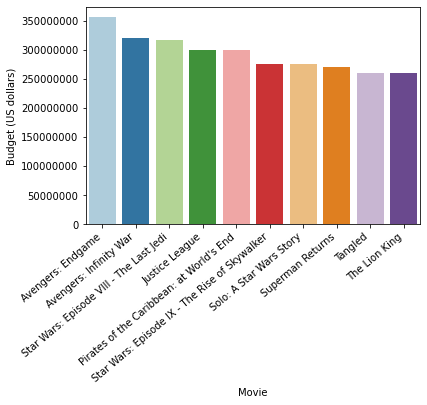

In [84]:
most_expensive_df = df.sort_values('budget',ascending=False)[:10]
most_expensive = most_expensive_df[['name', 'budget', 'gross','year']]

expensiveplot = sns.barplot(x = 'name',y='budget', data=most_expensive, palette="Paired")
expensiveplot.set_xticklabels(expensiveplot.get_xticklabels(), rotation=40, ha="right")
expensiveplot.set(xlabel='Movie', ylabel='Budget (US dollars)')

plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [85]:
#prints out top ten most movies with higest budget (table)
most_expensive

,name,budget,gross,year
7445,Avengers: Endgame,356000000.0,2.797501e+09,2019
7244,Avengers: Infinity War,321000000.0,2.048360e+09,2018
7075,Star Wars: Episode VIII - The Last Jedi,317000000.0,1.332699e+09,2017
7066,Justice League,300000000.0,6.579270e+08,2017
5060,Pirates of the Caribbean: at World's End,300000000.0,9.609965e+08,2007
7463,Star Wars: Episode IX - The Rise of Skywalker,275000000.0,1.078233e+09,2019
7261,Solo: A Star Wars Story,275000000.0,3.929248e+08,2018
4870,Superman Returns,270000000.0,3.910812e+08,2006
5658,Tangled,260000000.0,5.924628e+08,2010
7480,The Lion King,260000000.0,1.670728e+09,2019


Here is a graph to show the correlation between budget and gross. We can see that there is a positive correlation. 

In [86]:
#scatter plot of budget vs gross of movies
fig = px.scatter(df, x = 'budget', y= 'gross', color='budget',title="Budget of Movies versus Gross",)
fig.show()

Here is another scatter plot that graphs budget of movies versus score/ratings of the movie. We can see that there is a slightly positive correlation between the two variables, but not one that is super strong. 

In [87]:
#plots scatter plot of budget vs score
fig = px.scatter(df, x = 'budget', y= 'score', color='budget', title="Budget of Movies versus Score",)
fig.show()

On the other hand, we can see that there is a positive correlation between budget of movies and the year it was produced. This means that budgets have positively increased over the years. 

In [88]:
#graph plotting Budget vs Year of movie
fig = px.strip(df, x = 'budget', y= 'year', color ='year',title="Budget of Movies versus Year of Movie",)
fig.show()

## 6. Analyzing People (Movie stars, writers, directors)

The top 10 movie stars that have acted in a movie are...

In [89]:
#finds movie star names
df['star'].unique

<bound method Series.unique of 0         Jack Nicholson
1         Brooke Shields
2            Mark Hamill
3            Robert Hays
4            Chevy Chase
              ...       
7663        Shannon Bond
7664    Michael Saquella
7665        Onyama Laura
7666       Christina Roz
7667    Siyabonga Mabaso
Name: star, Length: 7668, dtype: object>

In [90]:
#finds movie writer names
df['writer'].unique

<bound method Series.unique of 0                  Stephen King
1       Henry De Vere Stacpoole
2                Leigh Brackett
3                  Jim Abrahams
4            Brian Doyle-Murray
                 ...           
7663              Joseph Ebanks
7664                Lisa Huston
7665               Lynno Lovert
7666              James Randall
7667               Pereko Mosia
Name: writer, Length: 7668, dtype: object>

In [91]:
#finds movie director names
df['director'].unique

<bound method Series.unique of 0       Stanley Kubrick
1        Randal Kleiser
2        Irvin Kershner
3          Jim Abrahams
4          Harold Ramis
             ...       
7663      Joseph Ebanks
7664       Dusty Dukatz
7665       Nkanya Nkwai
7666      James Randall
7667       Pereko Mosia
Name: director, Length: 7668, dtype: object>

We can see that the movie star that has acted in the most movies is Nicolas Cage. 

In [92]:
#finds the top 10 movie stars that have acted in a movie
movie_stars = df['star'].value_counts()[:10]
counts = movie_stars.reset_index()
counts

,index,star
0,Nicolas Cage,43
1,Robert De Niro,41
2,Tom Hanks,41
3,Denzel Washington,37
4,Bruce Willis,34
5,Tom Cruise,34
6,Johnny Depp,33
7,Sylvester Stallone,32
8,John Travolta,31
9,Mel Gibson,29


The following are all the movies that Nicolas Cage has starred in:

In [93]:
#finds all instances of movies that have nicolas cage in it
actor = df[df.star == 'Nicolas Cage'][["star","name", "genre","year","score"]]
actor

,star,name,genre,year,score
351,Nicolas Cage,Valley Girl,Comedy,1983,6.4
1001,Nicolas Cage,The Boy in Blue,Biography,1986,5.3
1052,Nicolas Cage,Raising Arizona,Comedy,1987,7.3
1308,Nicolas Cage,Vampire's Kiss,Comedy,1988,6.0
1661,Nicolas Cage,Wild at Heart,Comedy,1990,7.2
1763,Nicolas Cage,Fire Birds,Action,1990,4.8
2358,Nicolas Cage,Red Rock West,Crime,1993,7.0
2429,Nicolas Cage,Amos & Andrew,Comedy,1993,5.7
2498,Nicolas Cage,It Could Happen to You,Comedy,1994,6.4
2583,Nicolas Cage,Trapped in Paradise,Adventure,1994,5.9


The movie writer that has written the most movies is Woody Allen. 

In [94]:
#finds the top 10 movie stars that have acted in a movie
movie_stars = df['writer'].value_counts()[:10]
counts = movie_stars.reset_index()
counts

,index,writer
0,Woody Allen,37
1,Stephen King,31
2,Luc Besson,26
3,John Hughes,25
4,William Shakespeare,15
5,David Mamet,15
6,Joel Coen,13
7,Pedro AlmodÃ³var,13
8,Michael Crichton,12
9,Wes Craven,12


The movie director that has directed the most movies is also Woody Allen. 

In [95]:
#finds the top 10 movie stars that have acted in a movie
movie_stars = df['director'].value_counts()[:10]
counts = movie_stars.reset_index()
counts

,index,director
0,Woody Allen,38
1,Clint Eastwood,31
2,Directors,28
3,Steven Spielberg,27
4,Ron Howard,24
5,Steven Soderbergh,23
6,Ridley Scott,23
7,Joel Schumacher,22
8,Barry Levinson,20
9,Martin Scorsese,19


We can see that Woody Allen writes and directs all the following movies:

In [96]:
#finds all instances of woody allen
actor = df[df.director == 'Woody Allen'][["writer","director","name", "genre","year"]]
actor

,writer,director,name,genre,year
50,Woody Allen,Woody Allen,Stardust Memories,Comedy,1980
282,Woody Allen,Woody Allen,A Midsummer Night's Sex Comedy,Comedy,1982
414,Woody Allen,Woody Allen,Zelig,Comedy,1983
592,Woody Allen,Woody Allen,Broadway Danny Rose,Comedy,1984
743,Woody Allen,Woody Allen,The Purple Rose of Cairo,Comedy,1985
901,Woody Allen,Woody Allen,Hannah and Her Sisters,Comedy,1986
1126,Woody Allen,Woody Allen,Radio Days,Comedy,1987
1230,Woody Allen,Woody Allen,September,Drama,1987
1399,Woody Allen,Woody Allen,Another Woman,Drama,1988
1527,Woody Allen,Woody Allen,Crimes and Misdemeanors,Comedy,1989
